In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# DATA COLLECTION AND ANALYSIS

In [4]:
customer_data = pd.read_csv(r"C:\Users\trishadp\OneDrive - mintek.co.za\Desktop\My WORK\MACHINE LEARNING\CUSTOMER SEGMENTATION\Mall_Customers.csv")

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the Annual Income and Spending column as Cluster columns

In [10]:
X = customer_data.iloc[ :, [3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# CHOOSING THE NUMBER OF CLUSTERS

WCSS > WITHIN CLUSTERS SUM OF SQUARES

In [12]:
# FINDING WCSS VALUE FOR DIFFERENT NUMBER OF CLUSTERS

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init= 'k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)  # inertia_ is WCSS



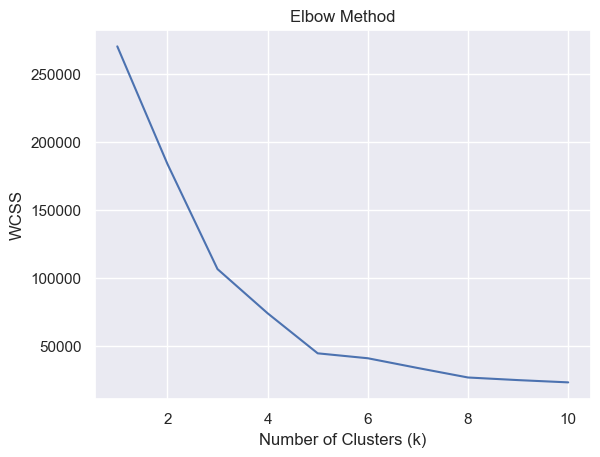

In [14]:
# Plot the Elbow Curve

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Optimum Number of Clusters = 5

## Training the K-Means Clustering Model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

## Vizualizing all the Clusters

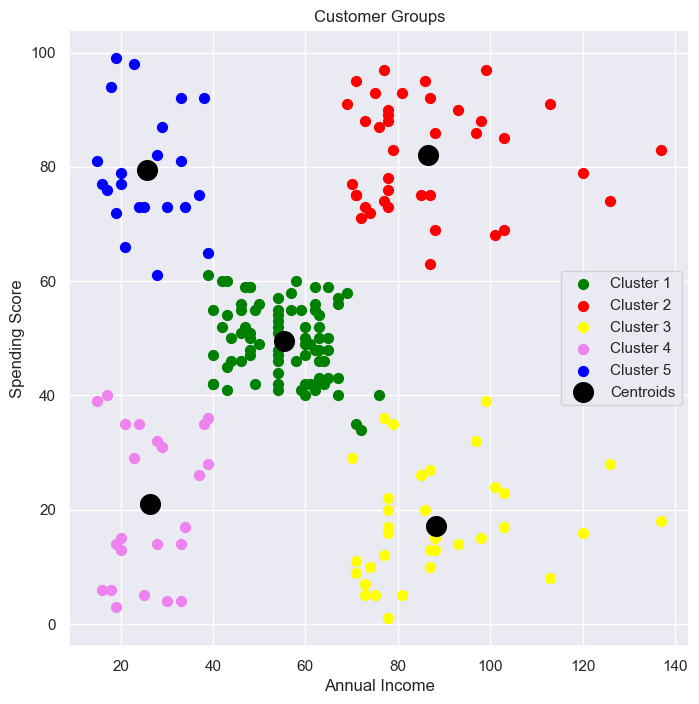

Button(description='Save Plot', style=ButtonStyle())

In [23]:

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def plot_clusters():
    plt.figure(figsize=(8, 8))
    
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
    plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
    plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')
    
    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=200, c='black', marker='o', label='Centroids')
    
    plt.title('Customer Groups')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Show the plot initially
plot_clusters()

# Define save function triggered by button click
def save_plot(button):
    plt.figure(figsize=(8, 8))
    
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
    plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
    plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')
    
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=200, c='black', marker='o', label='Centroids')
    
    plt.title('Customer Groups')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.grid(True)
    
    plt.savefig('clusters_plot.png', dpi=300)
    print("Plot saved as 'clusters_plot.png'")

# Create and display the button
save_button = widgets.Button(description="Save Plot")
save_button.on_click(save_plot)
display(save_button)
